<a href="https://colab.research.google.com/github/santiagonajera/CentrosDistribucionOptimizacionAvanzada/blob/main/localizacion8Nov2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import itertools
import numpy as np

# Matriz de distancias
distancias = {
    'CD': {'CD': 0, 'F1': 12, 'F2': 18, 'F3': 25, 'F4': 15, 'F5': 20, 'F6': 22},
    'F1': {'CD': 12, 'F1': 0, 'F2': 8, 'F3': 20, 'F4': 14, 'F5': 25, 'F6': 18},
    'F2': {'CD': 18, 'F1': 8, 'F2': 0, 'F3': 12, 'F4': 22, 'F5': 16, 'F6': 10},
    'F3': {'CD': 25, 'F1': 20, 'F2': 12, 'F3': 0, 'F4': 18, 'F5': 8, 'F6': 15},
    'F4': {'CD': 15, 'F1': 14, 'F2': 22, 'F3': 18, 'F4': 0, 'F5': 12, 'F6': 28},
    'F5': {'CD': 20, 'F1': 25, 'F2': 16, 'F3': 8, 'F4': 12, 'F5': 0, 'F6': 14},
    'F6': {'CD': 22, 'F1': 18, 'F2': 10, 'F3': 15, 'F4': 28, 'F5': 14, 'F6': 0}
}

def calcular_distancia_ruta(ruta, matriz_dist):
    """Calcula la distancia total de una ruta"""
    distancia_total = 0
    for i in range(len(ruta) - 1):
        distancia_total += matriz_dist[ruta[i]][ruta[i + 1]]
    return distancia_total

def encontrar_ruta_optima(punto_inicio='CD'):
    """Encuentra la ruta óptima usando fuerza bruta"""
    # Puntos a visitar (excluyendo el punto de inicio)
    puntos = [p for p in distancias.keys() if p != punto_inicio]

    mejor_ruta = None
    mejor_distancia = float('inf')

    # Generar todas las permutaciones posibles
    total_permutaciones = 0
    for permutacion in itertools.permutations(puntos):
        # Crear ruta completa: CD -> puntos -> CD
        ruta = [punto_inicio] + list(permutacion) + [punto_inicio]
        distancia = calcular_distancia_ruta(ruta, distancias)

        total_permutaciones += 1

        if distancia < mejor_distancia:
            mejor_distancia = distancia
            mejor_ruta = ruta

    return mejor_ruta, mejor_distancia, total_permutaciones

# Resolver el problema
print("=" * 60)
print("PROBLEMA DEL VIAJANTE (TSP)")
print("Encontrando la ruta óptima desde CD...")
print("=" * 60)

ruta_optima, distancia_optima, total_perms = encontrar_ruta_optima()

print(f"\n✓ Permutaciones evaluadas: {total_perms}")
print(f"\n🎯 RUTA ÓPTIMA ENCONTRADA:")
print("─" * 60)

# Mostrar la ruta
ruta_str = " → ".join(ruta_optima)
print(f"\n{ruta_str}")

# Mostrar detalles de cada tramo
print(f"\n📊 DETALLES DE LA RUTA:")
print("─" * 60)
for i in range(len(ruta_optima) - 1):
    origen = ruta_optima[i]
    destino = ruta_optima[i + 1]
    distancia_tramo = distancias[origen][destino]
    print(f"{origen} → {destino}: {distancia_tramo} unidades")

print("─" * 60)
print(f"\n📏 DISTANCIA TOTAL: {distancia_optima} unidades")
print("=" * 60)

# Mostrar las 5 mejores rutas
print("\n🏆 TOP 5 MEJORES RUTAS:")
print("─" * 60)

puntos = [p for p in distancias.keys() if p != 'CD']
todas_rutas = []

for permutacion in itertools.permutations(puntos):
    ruta = ['CD'] + list(permutacion) + ['CD']
    distancia = calcular_distancia_ruta(ruta, distancias)
    todas_rutas.append((ruta, distancia))

# Ordenar por distancia
todas_rutas.sort(key=lambda x: x[1])

for idx, (ruta, dist) in enumerate(todas_rutas[:5], 1):
    ruta_str = " → ".join(ruta)
    print(f"\n{idx}. Distancia: {dist} unidades")
    print(f"   {ruta_str}")

PROBLEMA DEL VIAJANTE (TSP)
Encontrando la ruta óptima desde CD...

✓ Permutaciones evaluadas: 720

🎯 RUTA ÓPTIMA ENCONTRADA:
────────────────────────────────────────────────────────────

CD → F1 → F2 → F6 → F3 → F5 → F4 → CD

📊 DETALLES DE LA RUTA:
────────────────────────────────────────────────────────────
CD → F1: 12 unidades
F1 → F2: 8 unidades
F2 → F6: 10 unidades
F6 → F3: 15 unidades
F3 → F5: 8 unidades
F5 → F4: 12 unidades
F4 → CD: 15 unidades
────────────────────────────────────────────────────────────

📏 DISTANCIA TOTAL: 80 unidades

🏆 TOP 5 MEJORES RUTAS:
────────────────────────────────────────────────────────────

1. Distancia: 80 unidades
   CD → F1 → F2 → F6 → F3 → F5 → F4 → CD

2. Distancia: 80 unidades
   CD → F4 → F5 → F3 → F6 → F2 → F1 → CD

3. Distancia: 85 unidades
   CD → F1 → F2 → F6 → F5 → F3 → F4 → CD

4. Distancia: 85 unidades
   CD → F4 → F3 → F5 → F6 → F2 → F1 → CD

5. Distancia: 87 unidades
   CD → F1 → F6 → F2 → F3 → F5 → F4 → CD


ANÁLISIS DE CLUSTERING K-MEANS (k=3)

📊 DATOS ORIGINALES:
────────────────────────────────────────────────────────────────────────────────
       Ciudad  Latitud  Longitud  Demanda  Cluster
        Quito    -0.18    -78.47      210        2
    Guayaquil    -2.17    -79.92      270        2
       Cuenca    -2.90    -79.00       63        1
        Manta    -0.97    -80.71       26        0
       Ambato    -1.25    -78.62       37        0
Santo Domingo    -0.25    -79.17       45        0
      Machala    -3.26    -79.96       29        1
         Loja    -3.99    -79.20       20        1
       Ibarra     0.35    -78.12       18        0
   Portoviejo    -1.05    -80.45       32        0


🎯 CENTROS DE DISTRIBUCIÓN PROPUESTOS:
────────────────────────────────────────────────────────────────────────────────
Centro   Latitud   Longitud  Demanda_Total  Num_Ciudades
   CD1 -0.696329 -79.434241            158             5
   CD2 -3.187857 -79.284286            112             3
   CD3 -

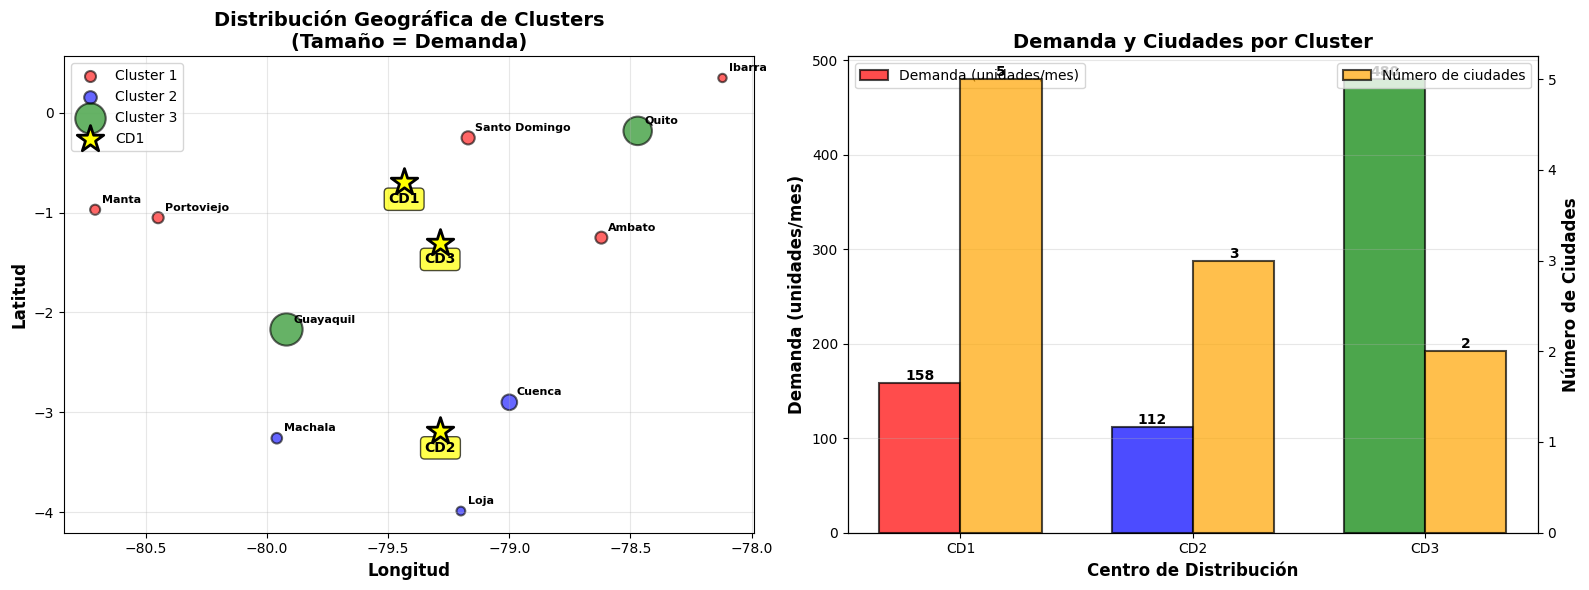

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

# Datos de demanda
datos = {
    'Ciudad': ['Quito', 'Guayaquil', 'Cuenca', 'Manta', 'Ambato',
               'Santo Domingo', 'Machala', 'Loja', 'Ibarra', 'Portoviejo'],
    'Latitud': [-0.18, -2.17, -2.90, -0.97, -1.25, -0.25, -3.26, -3.99, 0.35, -1.05],
    'Longitud': [-78.47, -79.92, -79.00, -80.71, -78.62, -79.17, -79.96, -79.20, -78.12, -80.45],
    'Demanda': [210, 270, 63, 26, 37, 45, 29, 20, 18, 32]
}

df = pd.DataFrame(datos)

def haversine(lon1, lat1, lon2, lat2):
    """
    Calcula la distancia en kilómetros entre dos puntos usando Haversine
    """
    # Convertir grados a radianes
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Fórmula de Haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))

    # Radio de la Tierra en kilómetros
    r = 6371

    return c * r

# Normalizar la demanda
scaler = StandardScaler()
demanda_normalizada = scaler.fit_transform(df[['Demanda']])

# Crear matriz de características: Latitud, Longitud, Demanda normalizada
X = np.column_stack([df['Latitud'].values,
                     df['Longitud'].values,
                     demanda_normalizada.flatten()])

# Aplicar K-Means con k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100, max_iter=500)
df['Cluster'] = kmeans.fit_predict(X)

# Obtener centros de los clusters (en espacio normalizado)
centros_normalizados = kmeans.cluster_centers_

# Calcular centros geográficos ponderados por demanda
centros_distribucion = []
for i in range(3):
    ciudades_cluster = df[df['Cluster'] == i]

    # Ponderar por demanda
    peso_total = ciudades_cluster['Demanda'].sum()
    lat_centro = (ciudades_cluster['Latitud'] * ciudades_cluster['Demanda']).sum() / peso_total
    lon_centro = (ciudades_cluster['Longitud'] * ciudades_cluster['Demanda']).sum() / peso_total

    centros_distribucion.append({
        'Centro': f'CD{i+1}',
        'Latitud': lat_centro,
        'Longitud': lon_centro,
        'Demanda_Total': peso_total,
        'Num_Ciudades': len(ciudades_cluster)
    })

df_centros = pd.DataFrame(centros_distribucion)

print("=" * 80)
print("ANÁLISIS DE CLUSTERING K-MEANS (k=3)")
print("=" * 80)

print("\n📊 DATOS ORIGINALES:")
print("─" * 80)
print(df.to_string(index=False))

print("\n\n🎯 CENTROS DE DISTRIBUCIÓN PROPUESTOS:")
print("─" * 80)
print(df_centros.to_string(index=False))

print("\n\n📍 ASIGNACIÓN DE CIUDADES POR CLUSTER:")
print("─" * 80)
for i in range(3):
    ciudades = df[df['Cluster'] == i]['Ciudad'].tolist()
    demanda_cluster = df[df['Cluster'] == i]['Demanda'].sum()
    print(f"\n🏢 CENTRO DE DISTRIBUCIÓN {i+1} (CD{i+1}):")
    print(f"   Coordenadas: ({df_centros.iloc[i]['Latitud']:.2f}, {df_centros.iloc[i]['Longitud']:.2f})")
    print(f"   Ciudades asignadas: {', '.join(ciudades)}")
    print(f"   Demanda total: {demanda_cluster} unidades/mes")

# Calcular distancias desde cada ciudad a su centro
print("\n\n📏 DISTANCIAS (Haversine) DE CIUDADES A SUS CENTROS:")
print("─" * 80)
for i in range(3):
    print(f"\n🏢 CENTRO DE DISTRIBUCIÓN {i+1}:")
    ciudades_cluster = df[df['Cluster'] == i]
    lat_centro = df_centros.iloc[i]['Latitud']
    lon_centro = df_centros.iloc[i]['Longitud']

    for _, ciudad in ciudades_cluster.iterrows():
        distancia = haversine(ciudad['Longitud'], ciudad['Latitud'],
                            lon_centro, lat_centro)
        print(f"   {ciudad['Ciudad']:15} → CD{i+1}: {distancia:6.2f} km")

# Estadísticas generales
print("\n\n📈 ESTADÍSTICAS GENERALES:")
print("─" * 80)
demanda_total = df['Demanda'].sum()
print(f"Demanda total: {demanda_total} unidades/mes")
for i in range(3):
    demanda_cluster = df[df['Cluster'] == i]['Demanda'].sum()
    porcentaje = (demanda_cluster / demanda_total) * 100
    print(f"CD{i+1} cubre: {porcentaje:.1f}% de la demanda")

# Crear visualización
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Mapa de clusters
ax1 = axes[0]
colores = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    ax1.scatter(cluster_data['Longitud'], cluster_data['Latitud'],
               c=colores[i], s=cluster_data['Demanda']*2,
               alpha=0.6, label=f'Cluster {i+1}', edgecolors='black', linewidth=1.5)

    # Anotar nombres de ciudades
    for _, row in cluster_data.iterrows():
        ax1.annotate(row['Ciudad'],
                    (row['Longitud'], row['Latitud']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, fontweight='bold')

# Marcar centros de distribución
for i, centro in df_centros.iterrows():
    ax1.scatter(centro['Longitud'], centro['Latitud'],
               c='yellow', s=400, marker='*',
               edgecolors='black', linewidth=2,
               label=f'CD{i+1}' if i == 0 else '', zorder=5)
    ax1.annotate(f"CD{i+1}",
                (centro['Longitud'], centro['Latitud']),
                xytext=(0, -15), textcoords='offset points',
                fontsize=10, fontweight='bold', ha='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

ax1.set_xlabel('Longitud', fontsize=12, fontweight='bold')
ax1.set_ylabel('Latitud', fontsize=12, fontweight='bold')
ax1.set_title('Distribución Geográfica de Clusters\n(Tamaño = Demanda)',
             fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Demanda por cluster
ax2 = axes[1]
demandas_cluster = [df[df['Cluster'] == i]['Demanda'].sum() for i in range(3)]
ciudades_cluster = [len(df[df['Cluster'] == i]) for i in range(3)]

x = np.arange(3)
width = 0.35

bars1 = ax2.bar(x - width/2, demandas_cluster, width, label='Demanda (unidades/mes)',
               color=['red', 'blue', 'green'], alpha=0.7, edgecolor='black', linewidth=1.5)
ax2_twin = ax2.twinx()
bars2 = ax2_twin.bar(x + width/2, ciudades_cluster, width, label='Número de ciudades',
                    color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)

ax2.set_xlabel('Centro de Distribución', fontsize=12, fontweight='bold')
ax2.set_ylabel('Demanda (unidades/mes)', fontsize=12, fontweight='bold')
ax2_twin.set_ylabel('Número de Ciudades', fontsize=12, fontweight='bold')
ax2.set_title('Demanda y Ciudades por Cluster', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'CD{i+1}' for i in range(3)])
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar in bars1:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax2_twin.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)